<a href="https://colab.research.google.com/github/yhp2205/python/blob/main/%EC%A7%80%ED%95%98%EC%B2%A0_%EC%8A%B9%ED%95%98%EC%B0%A8%EC%8A%B9%EA%B0%9D_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 전철역 5호선만 골라내기
2. 5호선중 승차 + 하차 인원수 top5역 순서대로 가져오기
3. matplotlib이나 seabon으로 bar chart로 그리기

4. 전체 역 중에 top5를 순서대로 가져와서 시각화
5. 승차 인원이 top 5인 역, 하차인원이 top5인 역

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,739 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and dire

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
dfPath = '/content/drive/MyDrive/2023 구글클라우드인공지능과정/코드/공공데이터/CARD_SUBWAY_MONTH_202309.csv'

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
df = pd.read_csv(dfPath, index_col = False)

In [ ]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20230901,8호선,석촌,8717,10257,20230904
1,20230901,8호선,송파,10608,10097,20230904
2,20230901,8호선,가락시장,8858,9967,20230904
3,20230901,8호선,문정,23576,24374,20230904
4,20230901,8호선,장지,19342,17388,20230904


In [ ]:
df.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'], dtype='object')

In [ ]:
pd.unique(df['사용일자'])

array([20230901, 20230902, 20230903, 20230904, 20230905, 20230906,
       20230907, 20230908, 20230909, 20230910, 20230911, 20230912,
       20230913, 20230914, 20230915, 20230916, 20230917, 20230918,
       20230919, 20230920, 20230921, 20230922, 20230923, 20230924,
       20230925, 20230926, 20230927, 20230928, 20230929, 20230930])

In [ ]:
# 1. 전철역 5호선만 골라내기
df5 = df[df['노선명'] == '5호선']

In [ ]:
df5.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
420,20230901,5호선,하남검단산,6965,6636,20230904
421,20230901,5호선,하남시청(덕풍·신장),8773,8454,20230904
422,20230901,5호선,하남풍산,5144,5097,20230904
423,20230901,5호선,미사,19283,20064,20230904
424,20230901,5호선,강일,6470,5828,20230904


In [ ]:
df5['하차총승객수'].isnull().sum()

0

In [ ]:
# 2. 5호선중 승차 + 하차 인원수 top5역 순서대로 가져오기
df5['승하차승객수'] = df5['승차총승객수']+df5['하차총승객수']

<ipython-input-112-199a34e5aa9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['승하차승객수'] = df5['승차총승객수']+df5['하차총승객수']


In [ ]:
df5.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차승객수
420,20230901,5호선,하남검단산,6965,6636,20230904,13601
421,20230901,5호선,하남시청(덕풍·신장),8773,8454,20230904,17227
422,20230901,5호선,하남풍산,5144,5097,20230904,10241
423,20230901,5호선,미사,19283,20064,20230904,39347
424,20230901,5호선,강일,6470,5828,20230904,12298


In [ ]:
df5 = df5.groupby('역명').sum()

<ipython-input-114-b44af8e81871>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df5 = df5.groupby('역명').sum()


In [ ]:
df5.sort_values(by = '승하차승객수', ascending = False, inplace = True)

In [ ]:
df5 = df5.head(5).reset_index()
df5

,역명,사용일자,승차총승객수,하차총승객수,등록일자,승하차승객수
0,광화문(세종문화회관),606927465,892986,937729,606927765,1830715
1,여의도,606927465,749794,802415,606927765,1552209
2,까치산,606927465,790640,754293,606927765,1544933
3,화곡,606927465,797562,738297,606927765,1535859
4,오목교(목동운동장앞),606927465,601861,636998,606927765,1238859


In [ ]:
df5

,역명,사용일자,승차총승객수,하차총승객수,등록일자,승하차승객수
0,광화문(세종문화회관),606927465,892986,937729,606927765,1830715
1,여의도,606927465,749794,802415,606927765,1552209
2,까치산,606927465,790640,754293,606927765,1544933
3,화곡,606927465,797562,738297,606927765,1535859
4,오목교(목동운동장앞),606927465,601861,636998,606927765,1238859


In [ ]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

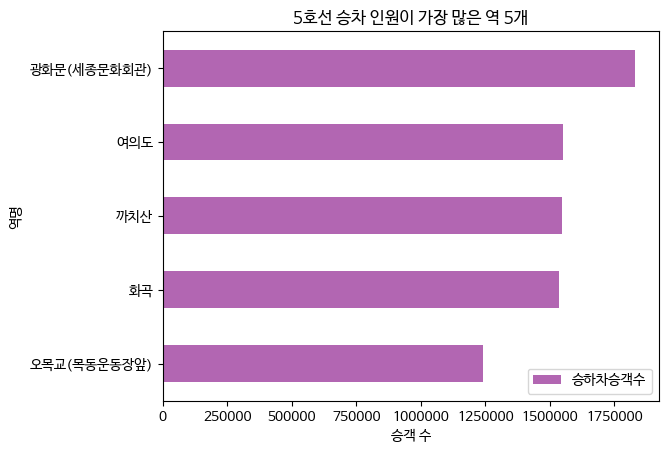

In [ ]:
# 그래프 그리기
df5 = df5.sort_values(by=['승하차승객수'], ascending=True)
plt.figure()
#df5['승하차승객수'].plot(kind='barh', grid = True)
df5.plot.barh(x="역명", y="승하차승객수", color = 'purple', alpha = 0.6, fontsize=10)
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.title('5호선 승차 인원이 가장 많은 역 5개')
plt.xlabel('승객 수')

plt.show()

In [ ]:
import seaborn as sns

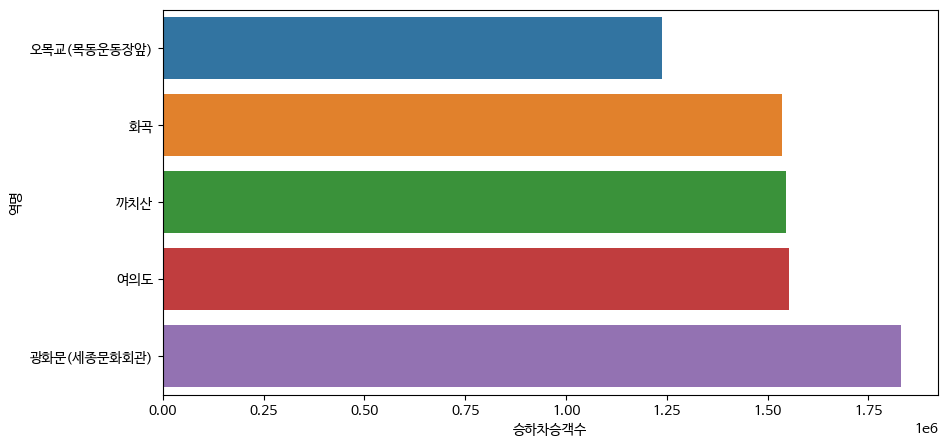

In [ ]:
#seaborn barplot
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x = df5['승하차승객수'], y = df5['역명'])

plt.show()

In [ ]:
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20230901,8호선,석촌,8717,10257,20230904
1,20230901,8호선,송파,10608,10097,20230904
2,20230901,8호선,가락시장,8858,9967,20230904
3,20230901,8호선,문정,23576,24374,20230904
4,20230901,8호선,장지,19342,17388,20230904


In [ ]:
df['승하차승객수'] = df['승차총승객수']+df['하차총승객수']
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차승객수
0,20230901,8호선,석촌,8717,10257,20230904,18974
1,20230901,8호선,송파,10608,10097,20230904,20705
2,20230901,8호선,가락시장,8858,9967,20230904,18825
3,20230901,8호선,문정,23576,24374,20230904,47950
4,20230901,8호선,장지,19342,17388,20230904,36730


In [ ]:
df = df.groupby('역명').sum()

<ipython-input-122-0dfed9a5f861>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('역명').sum()


In [ ]:
df.head()

,사용일자,승차총승객수,하차총승객수,등록일자,승하차승객수
역명,,,,,
4.19민주묘지,606927465,109945,105184,606927765,215129
가능,606927465,187828,179717,606927765,367545
가락시장,1213854930,477198,495868,1213855530,973066
가산디지털단지,1213854930,1518343,1580557,1213855530,3098900
가양,606927465,612197,589160,606927765,1201357


In [ ]:
df.reset_index(inplace = True)

In [ ]:
df = df.sort_values('승하차승객수', ascending = False).head()

<Figure size 640x480 with 0 Axes>

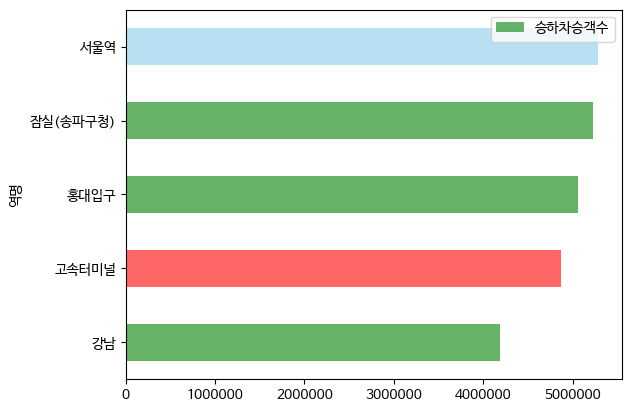

In [ ]:
# 그래프 그리기
df = df.sort_values(by=['승하차승객수'], ascending=True)
plt.figure()

df.plot.barh(x="역명", y="승하차승객수",color = ['green', 'red', 'green', 'green', 'skyblue'], alpha = 0.6, fontsize=10)
plt.ticklabel_format(axis='x',useOffset=False, style='plain')

plt.show()